In [53]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Machine learning college/19CSE305_LabData_Set3.1.xlsx'
import pandas as pd
df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


In [2]:
#A1 A
import pandas as pd
attribute_data_types = df.dtypes

for attribute, data_type in attribute_data_types.items():
    print(f"Attribute: {attribute}, Data Type: {data_type}")

Attribute: Record ID, Data Type: int64
Attribute: age, Data Type: int64
Attribute: sex, Data Type: object
Attribute: on thyroxine, Data Type: object
Attribute: query on thyroxine, Data Type: object
Attribute: on antithyroid medication, Data Type: object
Attribute: sick, Data Type: object
Attribute: pregnant, Data Type: object
Attribute: thyroid surgery, Data Type: object
Attribute: I131 treatment, Data Type: object
Attribute: query hypothyroid, Data Type: object
Attribute: query hyperthyroid, Data Type: object
Attribute: lithium, Data Type: object
Attribute: goitre, Data Type: object
Attribute: tumor, Data Type: object
Attribute: hypopituitary, Data Type: object
Attribute: psych, Data Type: object
Attribute: TSH measured, Data Type: object
Attribute: TSH, Data Type: object
Attribute: T3 measured, Data Type: object
Attribute: T3, Data Type: object
Attribute: TT4 measured, Data Type: object
Attribute: TT4, Data Type: object
Attribute: T4U measured, Data Type: object
Attribute: T4U, Data 

In [3]:
#A1 B
import pandas as pd
categorical_attributes = df.select_dtypes(include=['object'])
for attribute in categorical_attributes.columns:
    unique_values_count = len(df[attribute].unique())

    if unique_values_count <= 10:
        print(f"'{attribute}' has {unique_values_count} unique values, suitable for label encoding (ordinal variable).")
    else:
        print(f"'{attribute}' has {unique_values_count} unique values, suitable for one-hot encoding (nominal variable).")









'sex' has 3 unique values, suitable for label encoding (ordinal variable).
'on thyroxine' has 2 unique values, suitable for label encoding (ordinal variable).
'query on thyroxine' has 2 unique values, suitable for label encoding (ordinal variable).
'on antithyroid medication' has 2 unique values, suitable for label encoding (ordinal variable).
'sick' has 2 unique values, suitable for label encoding (ordinal variable).
'pregnant' has 2 unique values, suitable for label encoding (ordinal variable).
'thyroid surgery' has 2 unique values, suitable for label encoding (ordinal variable).
'I131 treatment' has 2 unique values, suitable for label encoding (ordinal variable).
'query hypothyroid' has 2 unique values, suitable for label encoding (ordinal variable).
'query hyperthyroid' has 2 unique values, suitable for label encoding (ordinal variable).
'lithium' has 1 unique values, suitable for label encoding (ordinal variable).
'goitre' has 2 unique values, suitable for label encoding (ordinal 

In [4]:
#A1 C
import pandas as pd
numeric_attributes = df.select_dtypes(include=['number'])
attribute_ranges = {}
for attribute in numeric_attributes.columns:
    min_value = df[attribute].min()
    max_value = df[attribute].max()
    attribute_ranges[attribute] = {'min': min_value, 'max': max_value}
for attribute, values in attribute_ranges.items():
    print(f"Attribute: {attribute}")
    print(f"Minimum Value: {values['min']}")
    print(f"Maximum Value: {values['max']}")
    print()


Attribute: Record ID
Minimum Value: 840801013
Maximum Value: 841031032

Attribute: age
Minimum Value: 1
Maximum Value: 97



In [5]:
#A1 D
import pandas as pd
missing_values = df.isnull().sum()
print("Missing Values in Each Attribute:")
print(missing_values)


Missing Values in Each Attribute:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

In [7]:
#A1 E
import numpy as np
from scipy import stats
numeric_attributes = df.select_dtypes(include=['number'])
z_score_threshold = 3
outliers = {}
for attribute in numeric_attributes.columns:
    z_scores = np.abs(stats.zscore(df[attribute]))
    attribute_outliers = df[attribute][z_scores > z_score_threshold]
    outliers[attribute] = attribute_outliers

for attribute, attribute_outliers in outliers.items():
    if not attribute_outliers.empty:
        print(f"Outliers in {attribute}:")
        print(attribute_outliers)
    else:
        print(f"No outliers found in {attribute}")



No outliers found in Record ID
No outliers found in age


In [8]:
#A1 F

numeric_attributes = df.select_dtypes(include=['number'])


mean_values = numeric_attributes.mean()


variance_values = numeric_attributes.var()


std_deviation_values = numeric_attributes.std()

print("Mean for Numeric Attributes:")
print(mean_values)
print("\nVariance for Numeric Attributes:")
print(variance_values)
print("\nStandard Deviation for Numeric Attributes:")
print(std_deviation_values)


Mean for Numeric Attributes:
Record ID    8.409340e+08
age          5.150900e+01
dtype: float64

Variance for Numeric Attributes:
Record ID    5.819759e+09
age          3.525585e+02
dtype: float64

Standard Deviation for Numeric Attributes:
Record ID    76287.343316
age             18.776541
dtype: float64


In [9]:
#A2

for numeric_attribute in numeric_attributes.columns:
    if df[numeric_attribute].isnull().sum() > 0:
        if df[numeric_attribute].dtype == 'object':

            median_value = df[numeric_attribute].median()
            df[numeric_attribute].fillna(median_value, inplace=True)
        else:

            mean_value = df[numeric_attribute].mean()
            df[numeric_attribute].fillna(mean_value, inplace=True)


for categorical_attribute in categorical_attributes.columns:
    if df[categorical_attribute].isnull().sum() > 0:
        mode_value = df[categorical_attribute].mode().iloc[0]
        df[categorical_attribute].fillna(mode_value, inplace=True)


print("Missing Values after Imputation:")
print(df.isnull().sum())

Missing Values after Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype:

In [30]:
#A3
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



attributes_to_normalize = ['on thyroxine', 'thyroid surgery']


df[attributes_to_normalize] = df[attributes_to_normalize].apply(pd.to_numeric, errors='coerce')


minmax_scaler = MinMaxScaler()
df[attributes_to_normalize] = minmax_scaler.fit_transform(df[attributes_to_normalize])


print("Normalized Data:")
print(df.head())



Normalized Data:
   Record ID       age sex  on thyroxine query on thyroxine  \
0  840801013  0.291667   F           NaN                  f   
1  840801014  0.291667   F           NaN                  f   
2  840801042  0.416667   F           NaN                  f   
3  840803046  0.364583   F           NaN                  f   
4  840803047  0.322917   F           NaN                  f   

  on antithyroid medication sick pregnant  thyroid surgery I131 treatment  \
0                         f    f        f              NaN              f   
1                         f    f        f              NaN              f   
2                         f    f        f              NaN              f   
3                         f    f        f              NaN              f   
4                         f    f        f              NaN              f   

   ... TT4 measured       TT4 T4U measured T4U FTI measured FTI TBG measured  \
0  ...            f       NaN            f NaN            f N

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [31]:
#A4
import pandas as pd


binary_attributes = [
    'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
    'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre',
    'tumor', 'hypopituitary', 'psych', 'TSH measured',
    'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
    'TBG measured', 'Condition'
]

vector1 = df.loc[3, binary_attributes].astype(bool)
vector2 = df.loc[8, binary_attributes].astype(bool)

intersection = sum(vector1 & vector2)
union = sum(vector1 | vector2)
jaccard_coefficient = intersection / union

matching_attributes = sum(vector1 == vector2)
total_attributes = len(binary_attributes)
simple_matching_coefficient = matching_attributes / total_attributes

print("Jaccard Coefficient (JC):", jaccard_coefficient)
print("Simple Matching Coefficient (SMC):", simple_matching_coefficient)





Jaccard Coefficient (JC): 1.0
Simple Matching Coefficient (SMC): 1.0


In [38]:
#A5
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
column_name_3 = 'on thyroxine'
column_name_8 = 'thyroid surgery'

label_encoder = LabelEncoder()

df[column_name_3 + '_encoded'] = label_encoder.fit_transform(df[column_name_3])
df[column_name_8 + '_encoded'] = label_encoder.fit_transform(df[column_name_8])


vector1 = df.iloc[0, [-2, -1]].values
vector2 = df.iloc[1, [-2, -1]].values


vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

cosine_sim = cosine_similarity(vector1, vector2)


cosine_sim_value = cosine_sim[0, 0]

print("Cosine Similarity between the two observations:", cosine_sim_value)








Cosine Similarity between the two observations: 0.0


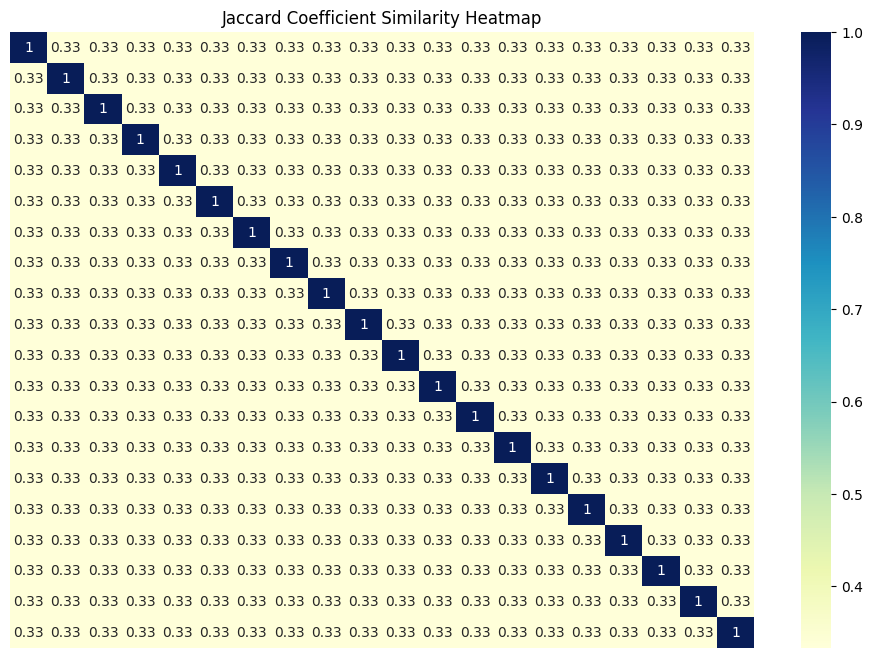

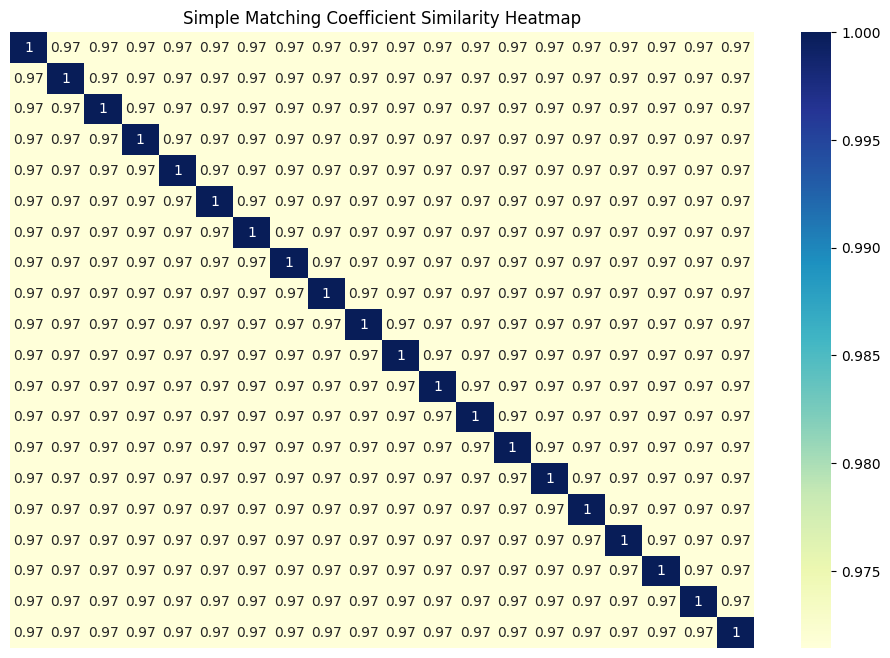

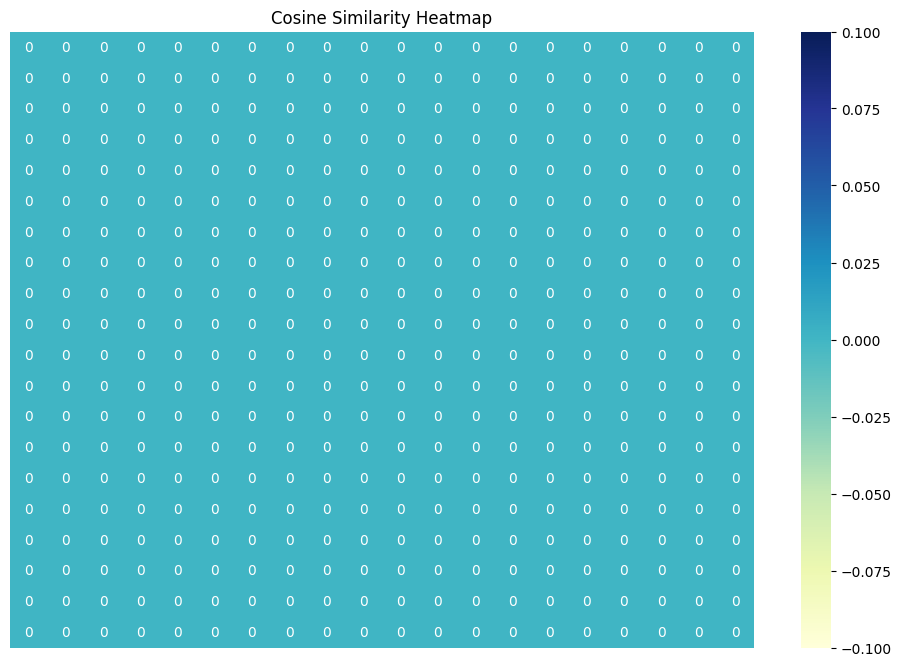

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0).astype(int)


subset_data = df.iloc[:20]


jc_similarity = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        class_jc_scores = jaccard_score(subset_data.iloc[i], subset_data.iloc[j], average=None)
        jc_similarity[i][j] = np.mean(class_jc_scores)


smc_similarity = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        smc_similarity[i][j] = np.mean(subset_data.iloc[i] == subset_data.iloc[j])


cos_similarity = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        cos_similarity[i][j] = 1 - cosine_similarity([subset_data.iloc[i]], [subset_data.iloc[j]])[0][0]


plt.figure(figsize=(12, 8))
sns.heatmap(jc_similarity, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient Similarity Heatmap")
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(smc_similarity, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient Similarity Heatmap")
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(cos_similarity, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity Heatmap")
plt.show()






